# Project: Wrangling and Analyze Data

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import requests
import os
import json
from timeit import default_timer as timer
from datetime import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [37]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [452]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [453]:
with open(os.path.join(folder_name, 
                       url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [454]:
os.listdir(folder_name)

['image-predictions.tsv']

In [38]:
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [11]:
#This is the alternative code provided in the project instructions because X/Twitter does not allow free APIs anymore


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = twitter_archive.tweet_id.values
# len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)


4. Read in the .txt file with the Twitter data 

In [39]:
twitter_new = pd.read_json('tweet_json.txt', lines=True)

Making copies here (faster to assess)

In [40]:
# Make copies of original pieces of data
new = twitter_new.copy()
archive = twitter_archive.copy()
images = image_predictions.copy()

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [443]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [466]:
new.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [468]:
new.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
827,2016-08-25 20:35:48+00:00,768909767477751808,768909767477751808,RT @dog_rates: When it's Janet from accounting...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Feb 18 02:24:13 +0000 2016...,NaN,NaN,NaN
1892,2015-12-10 00:10:43+00:00,674743008475090944,674743008475090944,This is Sophie. She just saw a spider. 10/10 d...,False,"[0, 98]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674743003064438784, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1514,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
603,2016-11-15 17:54:59+00:00,798585098161549313,798585098161549312,RT @dog_rates: This is Timison. He just told a...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,{'created_at': 'Thu Nov 19 03:29:07 +0000 2015...,NaN,NaN,NaN
787,2016-09-09 18:31:54+00:00,774314403806253056,774314403806253056,I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...,False,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 774314388044058624, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,24167,True,False,0.0,0.0,en,NaN,NaN,NaN,NaN
605,2016-11-15 01:44:00+00:00,798340744599797760,798340744599797760,RT @dog_rates: This is Davey. He'll have your ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 771770449999097856, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Fri Sep 02 18:03:10 +0000 2016...,NaN,NaN,NaN


In [444]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [583]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [446]:
new.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [447]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [600]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [464]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [572]:
#seeing how many actual dog breeds are in the prediction one section
images['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [584]:
#seeing how many actual dog breeds are in prediction two section
images['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [574]:
#seeing how many actual dog breeds are in prediction three section
images['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [585]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [857]:
images.query('p1_dog == True and p2_dog == True and p3_dog == True')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


In [586]:
#multiple by 100 so it's a number, not a floating decimal
images['p1_conf'] = images['p1_conf'] * 100
images['p2_conf'] = images['p2_conf'] * 100
images['p3_conf'] = images['p3_conf'] * 100

In [587]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.66650,True,Shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,Rhodesian_ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8143,True,redbone,36.06870,True,miniature_pinscher,22.27520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0311,True,Rottweiler,24.36820,True,Doberman,15.46290,True


In [588]:
#converting to int to use comparison operators
images['p1_conf'] = images['p1_conf'].astype(int)
images['p2_conf'] = images['p2_conf'].astype(int)
images['p3_conf'] = images['p3_conf'].astype(int)

In [595]:
images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
375,672997845381865473,https://pbs.twimg.com/media/CVb39_1XIAAMoIv.jpg,1,chow,51,True,Pomeranian,20,True,koala,12,False
422,674051556661161984,https://pbs.twimg.com/media/CVq2UHwWEAAduMw.jpg,1,Shih-Tzu,17,True,badger,16,False,three-toed_sloth,13,False
337,672231046314901505,https://pbs.twimg.com/media/CVQ-kfWWoAAXV15.jpg,1,killer_whale,82,False,grey_whale,3,False,hammerhead,2,False
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,72,True,toy_terrier,11,True,kelpie,5,True
632,680959110691590145,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2,carousel,50,False,feather_boa,6,False,pug,4,True
1494,783334639985389568,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,59,True,Shetland_sheepdog,13,True,Pembroke,10,True
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,99,False,skunk,0,False,hamster,0,False
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,56,True,French_bulldog,22,True,Labrador_retriever,6,True
1554,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,1,Lakeland_terrier,26,True,Irish_terrier,21,True,Airedale,13,True
1156,733460102733135873,https://pbs.twimg.com/media/Ci3GDeyUoAAKOxn.jpg,1,chow,93,True,beaver,2,False,dhole,1,False


In [581]:
#counting how many actual dog breeds in prediction one are above 50% confidence level
images[(images['p1_dog']==True) & (images['p1_conf']>50)].value_counts()

tweet_id            jpg_url                                          img_num  p1                p1_conf  p1_dog  p2                  p2_conf  p2_dog  p3                  p3_conf  p3_dog
666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg  1        German_shepherd   59       True    malinois            13       True    bloodhound          11       True      1
780601303617732608  https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg  1        Saint_Bernard     99       True    Cardigan            0        True    English_springer    0        True      1
777641927919427584  https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg  1        golden_retriever  96       True    Labrador_retriever  1        True    refrigerator        0        False     1
778027034220126208  https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg  1        clumber           94       True    cocker_spaniel      1        True    Lhasa               0        True      1
778039087836069888  https://pbs.twimg.com/media/Cs

In [596]:
#counting how many actual dog breeds in prediction two are above 50% confidence level

images[(images['p2_dog']==True) & (images['p2_conf']>50)].value_counts()

Series([], dtype: int64)

In [597]:
#counting how many actual dog breeds in prediction three are above 50% confidence level

images[(images['p3_dog']==True) & (images['p3_conf']>50)].value_counts()

Series([], dtype: int64)

In [598]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2075.000000
mean,7.384514e+17,1.203855,58.942651,12.971566,5.555663
std,6.785203e+16,0.561875,27.094714,10.056046,5.062975
min,6.660209e+17,1.000000,4.000000,0.000000,0.000000
25%,6.764835e+17,1.000000,36.000000,5.000000,1.000000
50%,7.119988e+17,1.000000,58.000000,11.000000,4.000000
75%,7.932034e+17,1.000000,84.000000,19.000000,9.000000
max,8.924206e+17,4.000000,100.000000,48.000000,27.000000


In [375]:
new.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [377]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [610]:
#seeing if these two columns from the merged dataset are equal to each other... (ran this below after merge, but placed in appropriate section)
df['text'].equals(df['full_text'])

KeyError: 'full_text'

In [603]:
df['rating_numerator'].value_counts().sort_values(ascending=True)

1776      1
27        1
24        1
84        1
99        1
50        1
121       1
75        1
80        1
60        1
44        1
143       1
26        1
144       1
88        1
45        1
420       1
15        1
165       1
204       1
0         2
1         5
2         9
4        16
3        19
6        32
5        34
14       40
7        52
8        95
9       151
13      283
11      413
10      429
12      473
Name: rating_numerator, dtype: int64

In [526]:
df['rating_denominator'].value_counts()

10     2055
50        3
80        2
11        2
2         1
120       1
110       1
130       1
40        1
90        1
20        1
170       1
150       1
7         1
70        1
Name: rating_denominator, dtype: int64

In [604]:
df['p1'].value_counts()

KeyError: 'p1'

### Quality issues


1. Tweet ID column name is not the same in all three dataframes; make first column in all
<br><br>
2. Remove retweets
<br><br>
2. Confidence level is a float, making it hard to compare. Make confidence level column a full number and an integer 
<br><br>
3. No threshold for confidence level column. Only keep p2 column where confidence levels are > 50%. This will make it easier for analysis
<br><br>
4. Dog names are dirty, they need to be cleaned (no underscores, no uppercase)
<br><br>
5. There are tweets which do not have pictures of dogs. Only rows with all dog predictions equaling TRUE should stay in the dataframe
<br><br>
6. Some of the ratings appear incorrect, apply new regex and make new column of ratings
<br><br>
7. Ratings are in two columns. Split columns of new regex ratings to a numerator and denominator column
<br><br>
8. Ratings need to be out of 10 and no greater than 15. Alter dataset so rating denominator is equal to ten and numerator is not greater than 15 (this is the currently highest score WeRateDogs gives out)

### Tidiness issues

1. Dataframes are all separate. Each contain information I want to analyze together. Merging all dataframes on tweet_id (new, archive, and images) will only keep tweets with images of dogs. Information about one type of observational unit (tweets) is spread across three different files/dataframes. 
<br><br>
2. Dog stage is spread across 4 columns - doggo, floofer, pupper, puppo. It is one variable and should form a single column 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [152]:
# I already did this above to save time in the assessment portion

### Issue 1:  Column names are not the same in all three dataframes; Tweet ID needs to be first column in all 3


#### Define: Rename id column in "new" dataframe,  all tweet_id columns the same, and in the same column location


#### Code

In [41]:
newid = new.rename(columns={'id': 'tweet_id'}, inplace=True)

In [42]:
column_to_move = new.pop("tweet_id")

new.insert(0, "tweet_id", column_to_move)

#### Test

In [489]:
new.head()

,tweet_id,created_at,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,2017-08-01 16:23:56+00:00,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


### Issue 2: Remove Retweets

#### Define
Drop tweet rows where retweeted status, retweeted status user id, and retweeted status timestamp is not null.  

#### Code

In [43]:
archive = archive[archive.retweeted_status_id.isnull()]
archive = archive[archive.retweeted_status_user_id.isnull()]
archive = archive[archive.retweeted_status_timestamp.isnull()]

#### Test

In [34]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
1388,700462010979500032,NaN,NaN,2016-02-18 23:28:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Murphy. He's a mini golden retriever. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,,,,,
1284,708479650088034305,NaN,NaN,2016-03-12 02:28:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bear. He's a Beneboop Cumberclap. Extreme...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708479650...,13,10,Bear,,,,,
1605,685681090388975616,6.855479e+17,4.196984e+09,2016-01-09 04:34:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Jack deserves another round of applause. If yo...,NaN,NaN,NaN,NaN,14,10,None,,,,,
1980,672975131468300288,NaN,NaN,2015-12-05 03:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuckles. He is one skeptical pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672975131...,10,10,Chuckles,,,pupper,,pupper
1503,692017291282812928,NaN,NaN,2016-01-26 16:12:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kingsley Wellensworth III. He owns 7 r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692017291...,9,10,Kingsley,,,,,


### Issue 3: Dog stage is spread across 4 columns - doggo, floofer, pupper, puppo. It is one variable and should form a single column

#### Define

Dog stage is spread across 4 columns - doggo, floofer, pupper, puppo. It is one variable and should form a single column 

#### Code

In [44]:
# Replace None in stage columns with empty string as follows.
archive.doggo.replace('None', '', inplace=True)  
archive.floofer.replace('None', '', inplace=True)
archive.pupper.replace('None', '', inplace=True)
archive.puppo.replace('None', '', inplace=True)

# Combine stage columns
archive['stage'] = archive.doggo + archive.floofer + archive.pupper + archive.puppo

In [45]:
#Format entries with multiple dog stages
archive.loc[archive.stage == 'doggopupper', 'stage'] = 'doggo, pupper' 
archive.loc[archive.stage == 'doggopuppo', 'stage'] = 'doggo, puppo' 
archive.loc[archive.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

#### Test

In [ ]:
archive.head()

### Issue 4:  Make one master dataframe from the three separate dataframes

#### Define
Merge all dataframes with the images dataframe so only tweets with images are analyzed

#### Code

In [46]:
df = images.merge(new,on='tweet_id').merge(archive,on='tweet_id')

#### Test

In [510]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   p2                  2073 non-null   object 
 2   p2_conf             2073 non-null   float64
 3   p2_dog              2073 non-null   bool   
 4   full_text           2073 non-null   object 
 5   retweet_count       2073 non-null   int64  
 6   favorite_count      2073 non-null   int64  
 7   favorited           2073 non-null   bool   
 8   retweeted           2073 non-null   bool   
 9   text                2073 non-null   object 
 10  rating_numerator    2073 non-null   int64  
 11  rating_denominator  2073 non-null   int64  
 12  name                2073 non-null   object 
 13  doggo               2073 non-null   object 
 14  floofer             2073 non-null   object 
 15  pupper              2073 non-null   object 
 16  puppo 

In [47]:
#two columns are similar: text and full-text, here I am checking whether they have the same content
df['text'].equals(df['full_text'])

True

In [48]:
#Because they're the same, we can drop one.
df.drop(['full_text',
             
], axis=1, inplace=True)

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2073 non-null   int64  
 1   p1                  2073 non-null   object 
 2   p1_conf             2073 non-null   float64
 3   p1_dog              2073 non-null   bool   
 4   retweet_count       2073 non-null   int64  
 5   favorite_count      2073 non-null   int64  
 6   favorited           2073 non-null   bool   
 7   retweeted           2073 non-null   bool   
 8   text                2073 non-null   object 
 9   rating_numerator    2073 non-null   int64  
 10  rating_denominator  2073 non-null   int64  
 11  name                2073 non-null   object 
 12  doggo               2073 non-null   object 
 13  floofer             2073 non-null   object 
 14  pupper              2073 non-null   object 
 15  puppo               2073 non-null   object 
dtypes: boo

### Issue 5: We only want columns where the prediction boolean is True for all three rows

#### Define

For data quality and efficiency, we only want rows for which all three predictions are True. If we were to only validate one column for True values, there would still be predictions that are not dog breeds. By filtering so all are True, we decrease the chances of analyzing predictions that are false.

#### Code

In [49]:
df = df.query('p1_dog == True and p2_dog == True and p3_dog == True')

#### Test

In [50]:
df[df['p1_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage


In [51]:
df[df['p2_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage


In [52]:
df[df['p3_dog'] == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage


### Issue 6: Make confidence level column a full number and an integer 

#### Define

Multiply confidence level by 100 to make it a full number, then convert it to an integer data type. 
At this point, we can also drop the p2 and p3 sections, we will not need them for future cleaning or analysis.

#### Code

In [53]:
df['p1_conf'] = df['p1_conf'] * 100

In [54]:
df['p1_conf'] = df['p1_conf'].astype(int)

#### Test

In [55]:
df['p1_conf'].describe()

count    1203.000000
mean       62.284289
std        25.357326
min         4.000000
25%        41.000000
50%        63.000000
75%        85.000000
max        99.000000
Name: p1_conf, dtype: float64

In [890]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 2071
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1242 non-null   int64  
 1   p1                  1242 non-null   object 
 2   p1_conf             1242 non-null   float64
 3   p1_dog              1242 non-null   bool   
 4   retweet_count       1242 non-null   int64  
 5   favorite_count      1242 non-null   int64  
 6   text                1242 non-null   object 
 7   rating_numerator    1242 non-null   int64  
 8   rating_denominator  1242 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(2)
memory usage: 88.5+ KB


### Issue 7: Only keep p1 rows where confidence levels are > 50% 


#### Define
Filter p1 so only tweets with above a 50% confidence level are included for analysis
(From the assessing portion, it was observed that the prediction one section had the most tweets with p1_dog being true and those over a 50% confidence level, this assessment allows us to choose the section with the greatest number of elligible tweets to analyze).

#### Code


In [56]:
#Filtering so only confidence levels above 50 are included in analysis
df = df[df['p1_conf'] > 50]

#### Test

In [57]:
df['p1_conf'].describe()

count    774.000000
mean      78.129199
std       15.109821
min       51.000000
25%       66.000000
50%       80.000000
75%       93.000000
max       99.000000
Name: p1_conf, dtype: float64

### Issue 8:  Clean breed names


#### Define
Dog breeds in p1 need to have no underscores and no uppercase

#### Code


In [58]:
df['p1'] = df['p1'].str.lower().str.replace("_", " ")

#### Test

In [59]:
df['p1']

2            german shepherd
4         miniature pinscher
5       bernese mountain dog
10          golden retriever
15                     lhasa
                ...         
1983                 samoyed
1984                pembroke
1986              pomeranian
1989                  basset
1991               chihuahua
Name: p1, Length: 774, dtype: object

### Issue 9:  Some of the ratings look off

#### Define

Some of the ratings may not be correct, extract ratings with a new regex and make a column of ratings

#### Code

In [60]:
df['rating'] = df['text'].str.extract(r'([1-9][0-9]*\/[1-9][0-9])', expand=False)

#### Test

In [61]:
df['rating'].value_counts()

12/10    211
11/10    160
10/10    159
13/10    123
9/10      51
8/10      28
14/10     15
5/10       8
7/10       6
6/10       3
9/11       1
27/10      1
4/10       1
88/80      1
80/80      1
60/50      1
44/40      1
2/10       1
84/70      1
Name: rating, dtype: int64

### Issue 10:  Split columns of new regex ratings to a numerator and denominator column


#### Define

New ratings need to be split into two columns, separated by the /

#### Code

In [62]:
df[['numerator', 'denominator']] = df['rating'].str.split('/', expand=True)

#### Test

In [901]:
df.head()

,tweet_id,p1,p1_conf,p1_dog,retweet_count,favorite_count,text,rating_numerator,rating_denominator,rating,numerator,denominator
2,666033412701032449,german shepherd,59,True,47,128,Here is a very happy pup. Big fan of well-main...,9,10,9/10,9,10
4,666049248165822465,miniature pinscher,56,True,41,111,Here we have a 1949 1st generation vulpix. Enj...,5,10,5/10,5,10
5,666050758794694657,bernese mountain dog,65,True,60,136,This is a truly beautiful English Wilson Staff...,10,10,10/10,10,10
10,666063827256086533,golden retriever,77,True,232,496,This is the happiest dog you will ever see. Ve...,10,10,10/10,10,10
15,666099513787052032,lhasa,58,True,73,164,Can stand on stump for what seems like a while...,8,10,8/10,8,10


### Issue 11: New numerator and denominator columns have NaN values and need to be integers

#### Define

Numerator and denominator columns should not have NaN values in order to loop through and fix them. They also need to be integer values to be able to compare and change them. 

In [63]:
df['numerator'] = df['numerator'].fillna(0).astype(int)


In [64]:
df['denominator'] = df['denominator'].fillna(10).astype(int)


#### Test

In [904]:
df['numerator'].isna().value_counts()

False    797
Name: numerator, dtype: int64

In [905]:
df['denominator'].isna().value_counts()

False    797
Name: denominator, dtype: int64

In [668]:
df['numerator'].value_counts()

12     260
11     205
10     197
13     145
9       58
8       31
14      15
7       12
5        9
6        3
60       1
27       1
4        1
80       1
88       1
44       1
121      1
2        1
3        1
84       1
Name: numerator, dtype: int64

In [735]:
df['denominator'].value_counts()

10    946
Name: denominator, dtype: int64

### Issue 12: Ratings are in two columns. Split columns of new regex ratings to a numerator and denominator column. Rating_numerator and rating_denominator no longer needed

#### Code



In [65]:
#Setting up variables for our for loop
numerators = df['numerator']
denominators = df['denominator']

In [66]:
#for loop to change numerators above 15 to 15
for i in numerators:
    if i > 15:
        df.loc[df["numerator"] > 15, "numerator"] = 15

In [67]:
#for loop to change denominators above 10 to 10
for i in denominators:
    if i > 10: 
        df.loc[df["denominator"] > 10, "denominator"] = 10

In [68]:
df.drop(['rating_numerator',
         'rating_denominator'
    
], axis=1, inplace=True)

#### Test

In [913]:
df['numerator'].value_counts()

12    220
11    166
10    161
13    129
9      52
8      28
14     15
5       8
7       6
15      6
6       3
2       1
4       1
0       1
Name: numerator, dtype: int64

In [914]:
df['denominator'].value_counts()

10    797
Name: denominator, dtype: int64

In [911]:
df.describe()

,tweet_id,p1_conf,retweet_count,favorite_count,rating_numerator,rating_denominator,numerator,denominator
count,7.970000e+02,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.0
mean,7.480297e+17,78.033877,2887.415307,9535.736512,11.493099,10.326223,11.105395,10.0
std,7.043793e+16,15.132833,3526.582681,11677.459780,5.247303,4.467805,1.695822,0.0
min,6.660334e+17,51.000000,41.000000,0.000000,1.000000,2.000000,0.000000,10.0
25%,6.808017e+17,65.000000,759.000000,2308.000000,10.000000,10.000000,10.000000,10.0
50%,7.289864e+17,79.000000,1675.000000,5005.000000,11.000000,10.000000,11.000000,10.0
75%,8.080013e+17,93.000000,3716.000000,12511.000000,12.000000,10.000000,12.000000,10.0
max,8.918152e+17,99.000000,32883.000000,106827.000000,88.000000,80.000000,15.000000,10.0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [106]:
df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [104]:
#finding top 10 dog appears most
dognames = df['p1'].value_counts()
dognames.head(10)

golden retriever      99
pembroke              61
labrador retriever    53
pug                   31
chihuahua             29
pomeranian            25
french bulldog        18
samoyed               18
malamute              17
toy poodle            17
Name: p1, dtype: int64

In [71]:
#seeing which dog gets the highest average rating 
groupby_rating = df.groupby('p1')['numerator'].mean().sort_values(ascending=False).head(10)
groupby_rating

p1
clumber                   15.0
gordon setter             14.0
afghan hound              13.0
saluki                    13.0
curly-coated retriever    13.0
briard                    13.0
border terrier            12.0
toy terrier               12.0
tibetan mastiff           12.0
redbone                   12.0
Name: numerator, dtype: float64

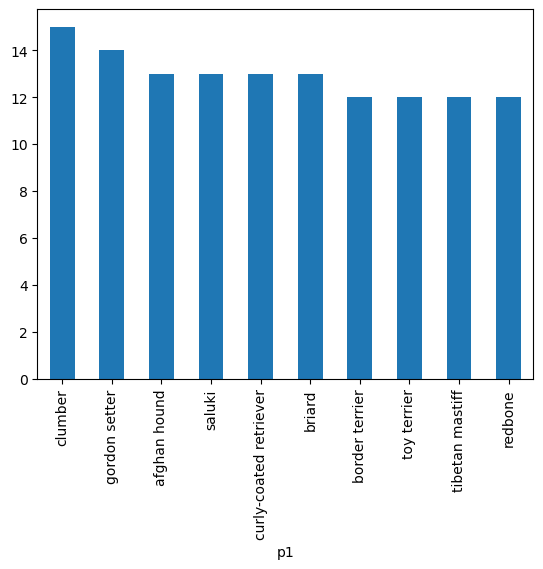

In [72]:
#top ten dogs with the highest average rating
df.groupby('p1')['numerator'].mean().sort_values(ascending=False).head(10).plot(kind='bar', x='p1', y='numerator');

In [73]:
#top ten dogs with the highest average favorites 
groupby_favorites = df.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(10)
groupby_favorites

p1
saluki                      32444.500000
irish water spaniel         25225.000000
french bulldog              19619.833333
afghan hound                17305.000000
black-and-tan coonhound     17012.000000
cardigan                    16993.300000
chesapeake bay retriever    16286.888889
newfoundland                16014.500000
samoyed                     15335.222222
leonberg                    14934.333333
Name: favorite_count, dtype: float64

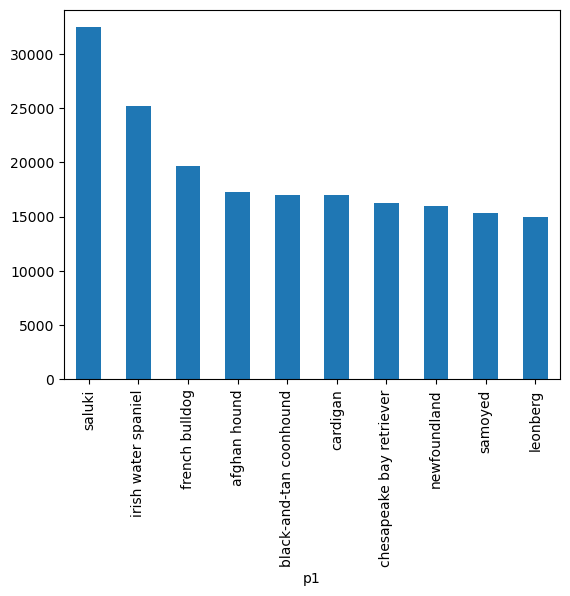

In [74]:
#visual for top ten dogs with the highest average favorite count
df.groupby('p1')['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar', x='p1', y='favorite_count');

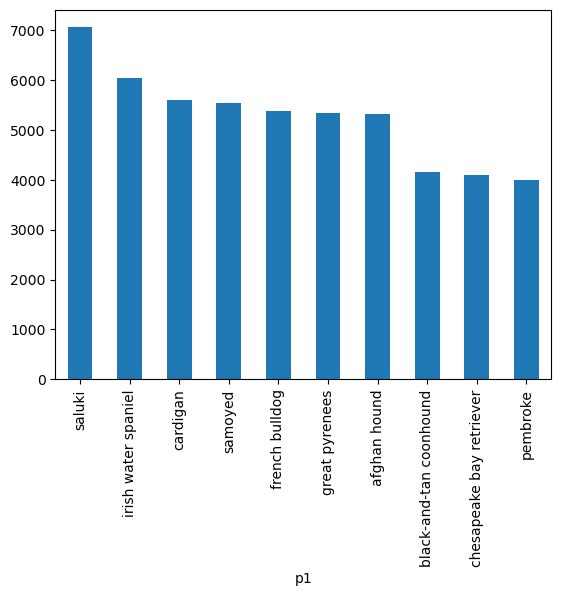

In [75]:
#visual for top ten dogs with highest average retweet count
df.groupby('p1')['retweet_count'].mean().sort_values(ascending=False).head(10).plot(kind='bar', x='p1', y='retweet_count');

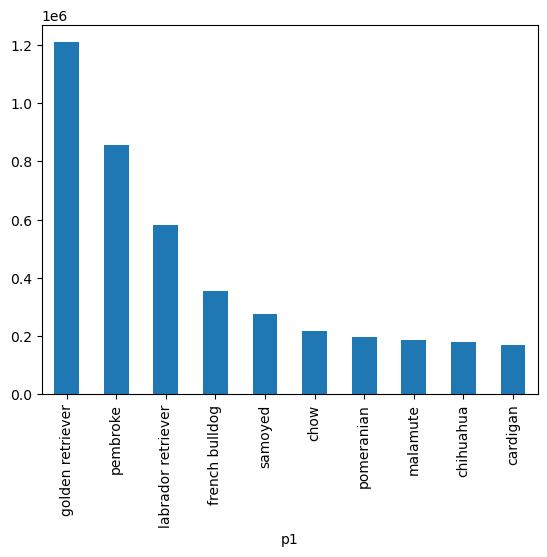

In [105]:
#now looking at summed highest favorite count 
df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10).plot(kind='bar', x='p1', y='favorite_count');

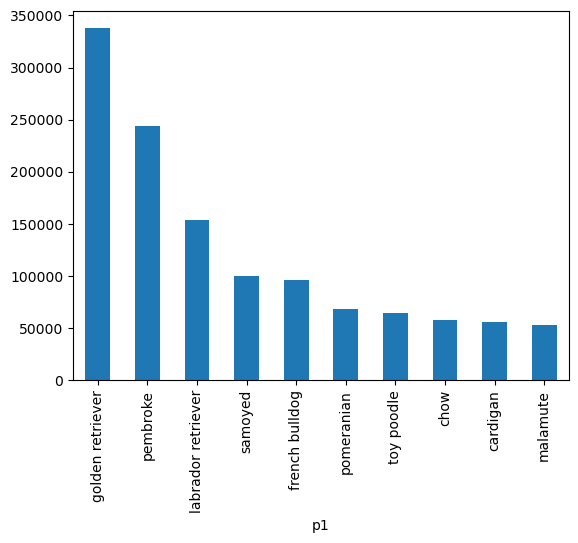

In [77]:
#summed highest retweet count
df.groupby('p1')['retweet_count'].sum().sort_values(ascending=False).head(10).plot(kind='bar', x='p1', y='retweet_count');

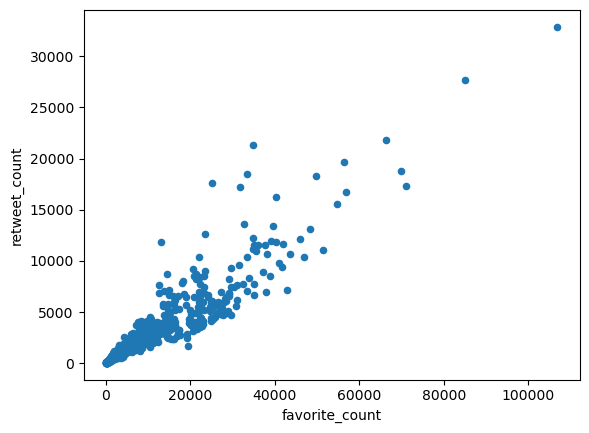

In [78]:
df.plot(kind='scatter', x='favorite_count', y='retweet_count');

<Axes: xlabel='numerator', ylabel='favorite_count'>

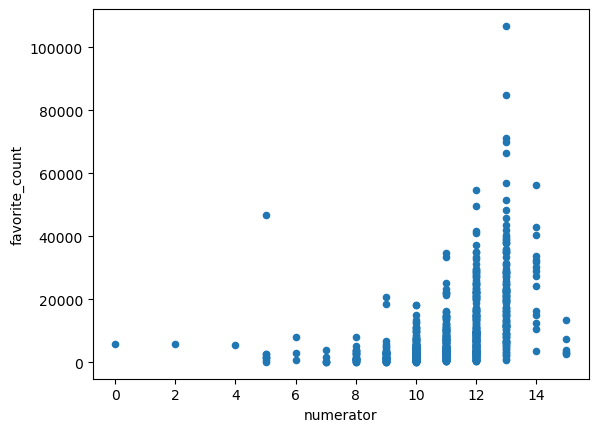

In [81]:
df.plot(kind='scatter', y='favorite_count', x='numerator')

In [103]:
df.groupby('p1')['numerator'].sum().sort_values(ascending=False)

p1
golden retriever       1131
pembroke                715
labrador retriever      603
pug                     323
chihuahua               301
                       ... 
giant schnauzer          10
appenzeller               9
tibetan terrier           7
miniature schnauzer       5
japanese spaniel          5
Name: numerator, Length: 96, dtype: int64

### Insights:
1. The top three dogs mentioned in tweets are: golden retriever, pembroke, and labrador retriever
<br><br>
2. The average ratings for dogs are not as helpful because dogs with only one rating of 15/10 are ranked as having the "highest average". Although this is unfair, the clumber (Clumber Spaniel) has the highest average rating.
<br><br>
3. If we sum the highest number of retweets and the highest number of favorites, the golden retriever beats the other dogs by a landslide, with the pembroke (Corgi) coming in second, and labrador retriever coming in third. This makes sense when you consider that golden retrievers have the highest number of tweets dedicated to them.

### Visualization

In [851]:
#Visualizations are shown in the above section